In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1. **Introducción a los Mínimos Cuadrados**

### 2. **Ajuste de Modelos Cuadráticos a Datos Experimentales**

#### Problema 1

Una pelota es arrojada hacia arriba. Una cámara de fotos toma fotos cada 0.1 segundos y a partir de esas fotos se calcula la altura de la pelota en cada instante.
En el archivo `altura_pelota.csv` se encuentran las mediciones obtenidas.

Sabiendo que la altura de la pelota depende del tiempo en forma cuadrática
$h(t) = c_0 + c_1 t + c_2 t^2,$ estimar los valores de $c_0, c_1, c_2$ ajustando los datos por mínimos cuadrados.

Resolvemos el problema mediante las ecuaciones normales
$
A^tA c = A^ty
$
para una matriz $A$ apropiada.


In [ ]:
import pandas as pd
# Los datos están en español!
datos = pd.read_csv("altura_pelota.csv", sep=";", decimal=",")   # dataFrame
datos.head(3)

,tiempo,altura
0,0.0,13.335240
1,0.1,15.936852
2,0.2,23.846084


In [ ]:
# Convertimos los datos a np.array
datosNP = datos.to_numpy()
print(datosNP.shape)

(101, 2)


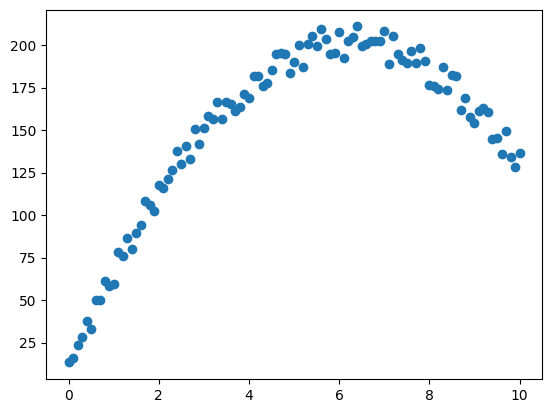

In [ ]:
# Graficamos
plt.scatter(datosNP[:,0], datosNP[:,1])

Resolver a partir de aqui

**Ejercicios**

1. Obtener la matriz A.
2. Resolver por mínimos cuadrados utilizando la función de escalonamiento utilizada en el laboratorio de ALC (no utilizar el solve de numpy o scipy, etc.)
3. Graficar la nube de puntos y la función encontrada.
4. Es posible saber en que punto la pelota toca el suelo para los valores encontrados?

In [ ]:
#### LU y calcular inversa

def calculaLU(matriz):
  # Función que realiza la descomposición LU de una matriz pasada como parámetro
  # matriz es una matriz de NxN
  # Retorna la factorización LU a través de una lista con dos matrices L y U de NxN.
  L = np.eye(matriz.shape[0]) #primero pensamos a L como la Identidad
  U = matriz.copy() #en cambio a U, la definimos a priori como una copia de la matriz
  m=matriz.shape[0] #cantidad filas
  n=matriz.shape[1] #cantidad columnas

  if m!=n:
    print('Matriz no cuadrada')
    return #es condición necesaria que la matriz sea cuadrada para que sea inversible

  for j in range(n):
      for i in range(j+1, n):
          # Construímos la función L y U
          L[i,j] = U[i,j] / U[j,j]
          U[i,:] = U[i,:] - L[i,j] * U[j,:]

  return L, U


def resolver_sist_triang_inf (L, w):
  #Resolvemos el sistema Ly = w. L y w son parámetros de entrada
  #L representa la matriz triangular inferior obtenida luego de haber hecho calculaLU(matriz)
  #w representa un vector obtenido de el archivo provisto visitas.txt

  y = np.zeros(w.shape)
  y[0] = w[0] #como L es triangular inferior, su primer elemento de y equivale al primer elemento de w
  for i in range (1,w.shape[0]):
    y[i] = w[i] - (L[i, :i]@y[:i]) #averiguamos los siguientes elementos de y_i a partir de w_i y los anteriores y_j (j < i)
  return y #retorna el vector y que será usado en el siguiente sistema



def resolver_sist_triang_sup (U, y): #resolvemos el sistema Ux = y. U e y son parámetros
  x = np.zeros(y.shape)
  # como U triangular superior, el último elemento del vector x equivale al último elemento de i sobre el coeficiente U[N-1][N-1].
  x[y.shape[0] -1] = y[y.shape[0] -1] / U[U.shape[0]-1, U.shape[0]-1]
  # averiguaremos los elementos del vector X de atrás para adelante, es decir, empezamos por el último y terminamos con el primero.
  # la lógica del cálculo de X es similar a la del anterior sistema, aunque ahora deberemos tener en cuenta que U[i][i] no es necesariamente 1.
  for i in range (y.shape[0]-2, -1,-1): #averiguamos los siguientes elementos de x_i a partir de y_i y los coeficientes de U.
    x[i] = (y[i] - (U[i, y.shape[0] - 1:i:-1]@x[y.shape[0]-1:i:-1]))/U[i][i]
  return x #retorna el vector x buscado


def calcular_inversa (matriz):
  #Función utilizada para calcular la inversa una matriz pasada como parámetro

  I = np.eye(matriz.shape[0])
  L, U = calculaLU(matriz) #agarramos su descomposición LU
  inversa = np.zeros(matriz.shape) #la inicializamos con 0
  for i in range(matriz.shape[0]):
    e = I[:, i] #agarramos en cada iteración un canónico, con los que resolvemos los sistemas
    #aprovechamos la descomposición LU
    y = resolver_sist_triang_inf(L, e)
    x = resolver_sist_triang_sup(U, y)
    inversa[:, i] = x #la solución final la definimos como columna de la inversa
  return inversa #retorna la inversa de la matriz pasada como parámetro

[10.44550189 61.46602244 -4.9496809 ]
12.585854216664847
1.1368683772161603e-13


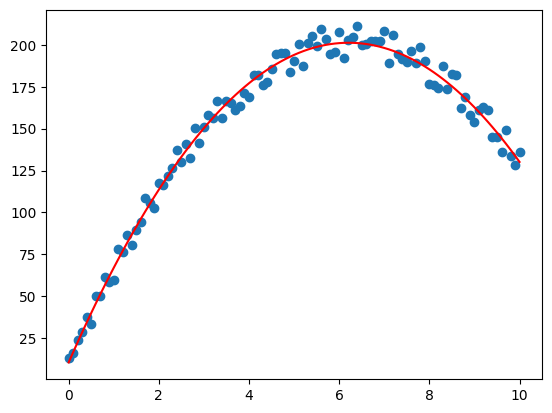

In [ ]:
#1)Obtenemos la matriz A
# A posee en su primer columna 1s, en la segunda los valores de t; y en la tercera y ultima los valores de t elevados al cuadrado

A = np.ones((datosNP.shape[0], 3))
A [:,0] = 1
A[:,1] = datosNP[:,0]
A[:,2] = datosNP[:,0]**2
#print(A)

#2) Queremos resolver el sistema A.T A c = A.T y

#Definimos a el vector y
y = datosNP[:,1]
#print(y)


lado_derecho = np.dot(A.T, y)
#print(lado_derecho)

lado_izquierdo = np.dot(A.T, A)
#print(lado_izquierdo)


#Hacemos la descomposicion LU de la matriz A.T A ; y luego la inverimos.
L,U = calculaLU(lado_izquierdo)
inversa = calcular_inversa(lado_izquierdo)

c = np.dot(inversa, lado_derecho)
print(c)


#3) Graficamos la función encontrada
plt.plot(datosNP[:,0], c[0] + c[1]*datosNP[:,0] + c[2]*datosNP[:,0]**2, c = 'red')
plt.scatter(datosNP[:,0], datosNP[:,1])

#La función encontrada es f(t) = c[0] + c[1]t + c[2]*t² = 10.44550189 + 61.46602244 * t + -4.9496809 * t²

#Para ver en que momento la pelota toca el suelo, deberemos buscar las raíces.
#Es importante notar que nos interesa aquella de mayor módulo, pues no estamos evaluando antes de tiempo 0.

r1, r2 = np.roots([c[2], c[1], c[0]])
toca_suelo = max(abs(r1), abs(r2))
print(toca_suelo)

print(c[0] + c[1]*toca_suelo + c[2]*(toca_suelo**2))

### 2. **Mínimos cuadrados para sumas de funciones**

Para datos $(t_j, y_j)$, $1 \le j \le m$ queremos ajustar una función del tipo
$$
y = c_1 f_1(t) + \dots + c_s f_s(t)
$$

Ejemplo: $y = a + b t + c t^2$.

RECORDAR: reemplazando los valores de $t$ e $y$ por los datos en la tabla obtenemos un sistema **lineal** de ecuaciones, donde las incógnitas son los $c_i$:

$$
\begin{align}
y_1 &= c_1 f_1(t_1) + \dots + c_s f_s(t_1) \\
&\vdots\\
y_m &= c_1 f_1(t_m) + \dots + c_s f_s(t_m)
\end{align}
$$

Cuando tenemos más datos (ecuaciones) que incógnitas, usamos mínimos cuadrados para obtener una solución aproximada.



#### Problema
Ajustar por mínimos cuadrados una función del tipo
$$
y = c_1 t^2 + c_2 e^t + c_3 t
$$
a los datos

|t|1|2|4|6|8|
| --- | --- | --- | --- | --- | --- |
|y|6|10|10|8|10|

In [ ]:
# Vectores de datos
ti = np.array([1, 2, 4, 6, 8])
yi = np.array([6, 10, 10, 8, 10])

# a) Definimos las funciones
def f1(t):
    return(t**2)

def f2(t):
    return(np.e**t)

def f3(t):
    return(t)

**Ejercicios**
1. Construir la matriz A a partir de la ecuación de y
2. Econtrar por mínimos cuadrados los coeficientes $$c_1, c_2, c_3$$
3. Verificar gráficamente imprimiendo los puntos (t,y) y la función contínua obtenida por los mínimos cuadrados.


[[1.00000000e+00 2.71828183e+00 1.00000000e+00]
 [4.00000000e+00 7.38905610e+00 2.00000000e+00]
 [1.60000000e+01 5.45981500e+01 4.00000000e+00]
 [3.60000000e+01 4.03428793e+02 6.00000000e+00]
 [6.40000000e+01 2.98095799e+03 8.00000000e+00]]
[-9.37735395e-01  6.16733396e-03  6.46005171e+00]


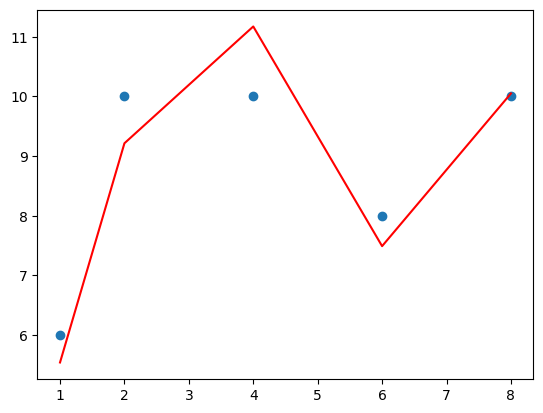

In [ ]:
#1) Construimos la matriz A a partir de la ecuación de y
A_2 = np.ones((ti.shape[0], 3))
A_2[:,0] = f1(ti)
A_2[:,1] = f2(ti)
A_2[:,2] = f3(ti)

print(A_2)
#Encontramos los respectivos coeficientes c1,c2 y c3
#Queremos resolver el sistema (A.T * A) * c = A.T y

#Definimos a el vector yi
yi = np.array([6, 10, 10, 8, 10])

lado_derecho_2 = np.dot(A_2.T, yi)
#print(lado_derecho)

lado_izquierdo_2 = np.dot(A_2.T, A_2)
#print(lado_izquierdo)


#Hacemos la descomposicion LU de la matriz A.T * A ; y luego la inverimos.
L_2,U_2 = calculaLU(lado_izquierdo_2)
inversa_2 = calcular_inversa(lado_izquierdo_2)

c_2 = np.dot(inversa_2, lado_derecho_2)
print(c)


#Verificamos gráficamente imprimiendo los puntos (t,y) y la función continua obtenida por los mínimos cuadrados
plt.plot(ti, c_2[0]*f1(ti) + c_2[1]*f2(ti) + c_2[2]*f3(ti), c = 'red')
plt.scatter(ti, yi)
